In [83]:
#Importing necessary libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
# Read the sampled dataset
sampled_dataset = pd.read_csv("sampled_dataset.csv")

In [85]:
sampled_dataset

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,CHHILAKIYA Cotton Feel Glace Cotton Elastic Fi...,home & kitchen,Home Furnishing,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/CHHILAKIYA-Cotton-Elasti...,NaN,NaN,₹599,"₹1,299"
1,Shining Jewel Gold Plated Pendant Mala for Men...,accessories,Jewellery,https://m.media-amazon.com/images/I/616IOVp+P5...,https://www.amazon.in/Shining-Jewel-Ganesha-Ru...,3.4,4,₹384,₹899
2,Home Plus 250 Watts Electric Vegetable Chopper...,appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/51A2VtSVTN...,https://www.amazon.in/Homeplus-Electric-Choppe...,4.2,233,"₹1,139","₹1,999"
3,Bajaj 500 Watt GX-1 Mixer Grinder with 3 Jars-...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-GX-1-500-Watt-Mixe...,4.0,"20,488","₹2,289","₹3,850"
4,Label RITU KUMAR Sequre Neck Strappy Printed L...,women's clothing,Western Wear,https://m.media-amazon.com/images/I/81aB6gbO7g...,https://www.amazon.in/Label-RITU-KUMAR-Strappy...,NaN,NaN,"₹2,250","₹4,500"
...,...,...,...,...,...,...,...,...,...
9995,"PKST 14"" Big LED Ring Light for Photo and Vide...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61uYBqcIi3...,https://www.amazon.in/Compatible-Camera-Smartp...,5.0,2,"₹1,995","₹3,499"
9996,RANI SAAHIBA Women's Chiffon Floral Print Sare...,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RANI-SAAHIBA-Chiffon-Wit...,3.4,30,₹399,"₹1,599"
9997,Van Heusen Men's Plain Slim Fit Formal Shirt,men's clothing,Shirts,https://m.media-amazon.com/images/I/619fNz3KSE...,https://www.amazon.in/Van-Heusen-Plain-Formal-...,NaN,NaN,"₹1,449","₹2,699"
9998,SHAUN Men Trackpent (631MNP3),sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/81NVORNtCk...,https://www.amazon.in/Shaun-Cotton-Trackpant-M...,3.4,102,₹953,"₹1,999"


In [86]:
sampled_dataset.isnull()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,True,True,False,False
9998,False,False,False,False,False,False,False,False,False


In [87]:
sampled_dataset.isnull().sum()

name                 0
main_category        0
sub_category         0
image                0
link                 0
ratings           3184
no_of_ratings     3184
discount_price    1079
actual_price       337
dtype: int64

In [88]:
sampled_dataset.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

In [89]:
sampled_dataset.drop_duplicates()

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,CHHILAKIYA Cotton Feel Glace Cotton Elastic Fi...,home & kitchen,Home Furnishing,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/CHHILAKIYA-Cotton-Elasti...,NaN,NaN,₹599,"₹1,299"
1,Shining Jewel Gold Plated Pendant Mala for Men...,accessories,Jewellery,https://m.media-amazon.com/images/I/616IOVp+P5...,https://www.amazon.in/Shining-Jewel-Ganesha-Ru...,3.4,4,₹384,₹899
2,Home Plus 250 Watts Electric Vegetable Chopper...,appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/51A2VtSVTN...,https://www.amazon.in/Homeplus-Electric-Choppe...,4.2,233,"₹1,139","₹1,999"
3,Bajaj 500 Watt GX-1 Mixer Grinder with 3 Jars-...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-GX-1-500-Watt-Mixe...,4.0,"20,488","₹2,289","₹3,850"
4,Label RITU KUMAR Sequre Neck Strappy Printed L...,women's clothing,Western Wear,https://m.media-amazon.com/images/I/81aB6gbO7g...,https://www.amazon.in/Label-RITU-KUMAR-Strappy...,NaN,NaN,"₹2,250","₹4,500"
...,...,...,...,...,...,...,...,...,...
9995,"PKST 14"" Big LED Ring Light for Photo and Vide...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61uYBqcIi3...,https://www.amazon.in/Compatible-Camera-Smartp...,5.0,2,"₹1,995","₹3,499"
9996,RANI SAAHIBA Women's Chiffon Floral Print Sare...,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RANI-SAAHIBA-Chiffon-Wit...,3.4,30,₹399,"₹1,599"
9997,Van Heusen Men's Plain Slim Fit Formal Shirt,men's clothing,Shirts,https://m.media-amazon.com/images/I/619fNz3KSE...,https://www.amazon.in/Van-Heusen-Plain-Formal-...,NaN,NaN,"₹1,449","₹2,699"
9998,SHAUN Men Trackpent (631MNP3),sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/81NVORNtCk...,https://www.amazon.in/Shaun-Cotton-Trackpant-M...,3.4,102,₹953,"₹1,999"


In [90]:
# Clean 'no_of_ratings' column by removing commas
sampled_dataset['no_of_ratings'] = sampled_dataset['no_of_ratings'].astype(str).str.replace(',', '')

# Convert 'ratings' and 'no_of_ratings' columns to numeric
sampled_dataset['ratings'] = pd.to_numeric(sampled_dataset['ratings'], errors='coerce')
sampled_dataset['no_of_ratings'] = pd.to_numeric(sampled_dataset['no_of_ratings'], errors='coerce')

# Fill missing values in 'ratings' and 'no_of_ratings' columns
sampled_dataset['ratings'].fillna(sampled_dataset['ratings'].median(), inplace=True)
sampled_dataset['no_of_ratings'].fillna(sampled_dataset['no_of_ratings'].median(), inplace=True)

# Convert 'discount_price' and 'actual_price' columns to numeric
sampled_dataset['discount_price'] = sampled_dataset['discount_price'].str.replace('₹', '').str.replace(',', '')
sampled_dataset['actual_price'] = sampled_dataset['actual_price'].str.replace('₹', '').str.replace(',', '')
sampled_dataset['discount_price'] = pd.to_numeric(sampled_dataset['discount_price'], errors='coerce')
sampled_dataset['actual_price'] = pd.to_numeric(sampled_dataset['actual_price'], errors='coerce')

# Fill null values with the median
discount_price_median = sampled_dataset['discount_price'].median()
actual_price_median = sampled_dataset['actual_price'].median()
sampled_dataset['discount_price'].fillna(discount_price_median, inplace=True)
sampled_dataset['actual_price'].fillna(actual_price_median, inplace=True)

In [91]:
sampled_dataset.isnull().sum()

name              0
main_category     0
sub_category      0
image             0
link              0
ratings           0
no_of_ratings     0
discount_price    0
actual_price      0
dtype: int64

In [92]:
sampled_dataset

,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price
0,CHHILAKIYA Cotton Feel Glace Cotton Elastic Fi...,home & kitchen,Home Furnishing,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/CHHILAKIYA-Cotton-Elasti...,3.9,21.0,599.0,1299.0
1,Shining Jewel Gold Plated Pendant Mala for Men...,accessories,Jewellery,https://m.media-amazon.com/images/I/616IOVp+P5...,https://www.amazon.in/Shining-Jewel-Ganesha-Ru...,3.4,4.0,384.0,899.0
2,Home Plus 250 Watts Electric Vegetable Chopper...,appliances,Kitchen & Home Appliances,https://m.media-amazon.com/images/I/51A2VtSVTN...,https://www.amazon.in/Homeplus-Electric-Choppe...,4.2,233.0,1139.0,1999.0
3,Bajaj 500 Watt GX-1 Mixer Grinder with 3 Jars-...,appliances,All Appliances,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/Bajaj-GX-1-500-Watt-Mixe...,4.0,20488.0,2289.0,3850.0
4,Label RITU KUMAR Sequre Neck Strappy Printed L...,women's clothing,Western Wear,https://m.media-amazon.com/images/I/81aB6gbO7g...,https://www.amazon.in/Label-RITU-KUMAR-Strappy...,3.9,21.0,2250.0,4500.0
...,...,...,...,...,...,...,...,...,...
9995,"PKST 14"" Big LED Ring Light for Photo and Vide...","tv, audio & cameras",Cameras,https://m.media-amazon.com/images/I/61uYBqcIi3...,https://www.amazon.in/Compatible-Camera-Smartp...,5.0,2.0,1995.0,3499.0
9996,RANI SAAHIBA Women's Chiffon Floral Print Sare...,women's clothing,Ethnic Wear,https://m.media-amazon.com/images/W/IMAGERENDE...,https://www.amazon.in/RANI-SAAHIBA-Chiffon-Wit...,3.4,30.0,399.0,1599.0
9997,Van Heusen Men's Plain Slim Fit Formal Shirt,men's clothing,Shirts,https://m.media-amazon.com/images/I/619fNz3KSE...,https://www.amazon.in/Van-Heusen-Plain-Formal-...,3.9,21.0,1449.0,2699.0
9998,SHAUN Men Trackpent (631MNP3),sports & fitness,All Exercise & Fitness,https://m.media-amazon.com/images/I/81NVORNtCk...,https://www.amazon.in/Shaun-Cotton-Trackpant-M...,3.4,102.0,953.0,1999.0


In [93]:
print(sampled_dataset.dtypes)

name               object
main_category      object
sub_category       object
image              object
link               object
ratings           float64
no_of_ratings     float64
discount_price    float64
actual_price      float64
dtype: object


In [94]:
# Split the dataset into training and testing sets
train_data, test_data = train_test_split(sampled_dataset, test_size=0.2, random_state=42)

In [95]:
counts = sampled_dataset['main_category'].value_counts()
count_percentage = sampled_dataset['main_category'].value_counts(1)*100
counts_df = pd.DataFrame({'Category':counts.index,'Counts':counts.values,'Percent':np.round(count_percentage.values,2)})
display(counts_df)
px.bar(data_frame=counts_df,
 x='Category',
 y='Counts',
 color='Counts',
 color_continuous_scale='reds',
 text_auto=True,
 title=f'Count of Items in Each Category')

,Category,Counts,Percent
0,accessories,2238,22.38
1,"tv, audio & cameras",1393,13.93
2,men's shoes,1305,13.05
3,women's clothing,1273,12.73
4,men's clothing,1235,12.35
5,stores,598,5.98
6,appliances,539,5.39
7,kids' fashion,241,2.41
8,beauty & health,212,2.12
9,home & kitchen,192,1.92


In [96]:
# Define the columns to keep
useful_columns = ['name', 'main_category', 'ratings', 'no_of_ratings' , 'actual_price' , 'discount_price']

# Create a ColumnTransformer to select only useful columns
ct = ColumnTransformer([('keep', 'passthrough', useful_columns)])

# Fit and transform the dataset
X = ct.fit_transform(sampled_dataset)

# Convert X back to a dataframe
sampled_dataset_df = pd.DataFrame(X, columns=useful_columns)

In [97]:
# Calculate the average ratings and total counts of ratings for each product
ratings_mean_count = pd.DataFrame(sampled_dataset_df.groupby("name")["ratings"].mean())
ratings_mean_count["no_of_ratings"] = sampled_dataset_df.groupby("name")["no_of_ratings"].sum()

# Set the conditions for filtering the recommendations
mean_rating_threshold = 4.5
min_ratings_count = 100

# Filter the recommendations based on the conditions
filtered_recommendations = ratings_mean_count[
    (ratings_mean_count["ratings"] >= mean_rating_threshold) &
    (ratings_mean_count["no_of_ratings"] >= min_ratings_count)
]

# Sort the filtered recommendations by average ratings in descending order
sorted_recommendations = filtered_recommendations.sort_values(by='ratings', ascending=False)

# Select the top n recommendations
n = 5
top_recommendations = sorted_recommendations.head(n)

# Display top_recommendations in descending order
top_recommendations = top_recommendations.sort_values(by='ratings', ascending=False)
print(top_recommendations)

                                                    ratings no_of_ratings
name                                                                     
Psalm 46: 10 - Purple Checkbook Cover (9.99)            4.9        1158.0
SMALLRIG Camera A6400 A6100 Cage for Sony A6400...      4.8        1066.0
Crocs Unisex Adult Orange Zing/Multi Classic Ti...      4.8         143.0
CAIUL Compatible Mini 11 Camera Case Bundle wit...      4.8         243.0
Music Nomad MN105 Fretboard Oil Cleaner and Con...      4.8        6414.0


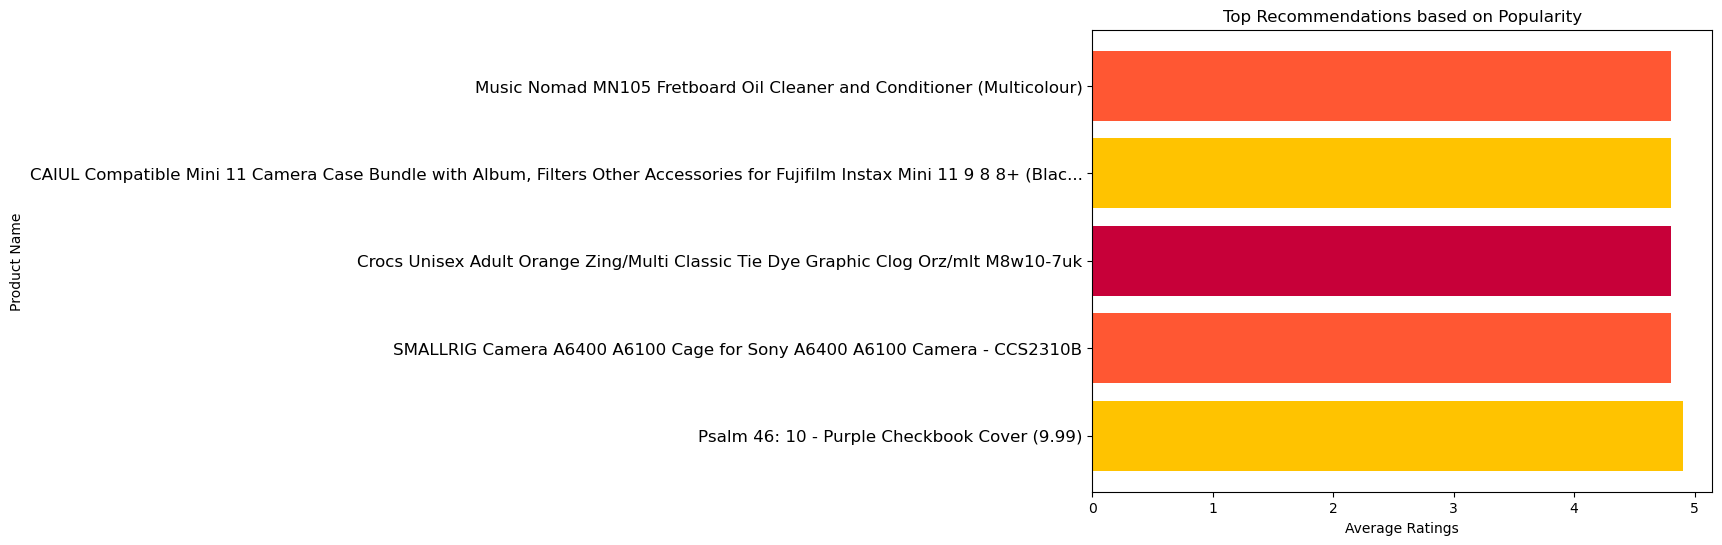

In [98]:
# Define the gradient colors
colors = ['#FFC300', '#FF5733', '#C70039']

plt.figure(figsize=(8, 6))
plt.barh(top_recommendations.index, top_recommendations['ratings'], color=colors)

plt.xlabel('Average Ratings')
plt.ylabel('Product Name')
plt.title('Top Recommendations based on Popularity')

# Increase the font size of y-axis tick labels
plt.tick_params(axis='y', labelsize=12)

plt.show()

In [99]:
# Calculate the performance metrics for popularity-based filtering
popularity_actual_ratings = np.array(test_data['ratings'])
popularity_predicted_ratings = np.array(sampled_dataset_df.loc[test_data.index]['ratings'])
popularity_mse = mean_squared_error(popularity_actual_ratings, popularity_predicted_ratings)
popularity_mae = mean_absolute_error(popularity_actual_ratings, popularity_predicted_ratings)
popularity_r2 = r2_score(popularity_actual_ratings, popularity_predicted_ratings)

# Print the performance metrics for popularity-based filtering
print('Popularity-Based Filtering:')
print('RMSE:', np.sqrt(popularity_mse))
print('MAE:', popularity_mae)
print('R2 Score:', popularity_r2)

Popularity-Based Filtering:
RMSE: 0.0
MAE: 0.0
R2 Score: 1.0


In [100]:
# Content-based filtering

# Select the relevant columns for content-based filtering
content_columns = ['name', 'actual_price', 'discount_price', 'main_category', 'ratings']
content_data = sampled_dataset[content_columns].copy()

# Encode string features to numerical values
label_encoder = LabelEncoder()
content_data['name_encoded'] = label_encoder.fit_transform(content_data['name'])
content_data['main_category_encoded'] = label_encoder.fit_transform(content_data['main_category'])

# Create a dataframe with the price and encoded features
features_df = content_data[['actual_price', 'discount_price', 'name_encoded', 'main_category_encoded']]

# Compute cosine similarity matrix for the features
features_similarities = cosine_similarity(features_df)

In [101]:
# Function to get content-based recommendations based on product name
def get_content_based_recommendations(product_name, num_recommendations):
    # Find the index of the product with the given name
    product_index = content_data[content_data['name'] == product_name].index
    if len(product_index) == 0:
        print("Product not found!")
        return None
    product_index = product_index[0]

    # Get the similarity scores for all products
    similarity_scores = list(enumerate(features_similarities[product_index]))

    # Sort the products based on the similarity scores
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)

    # Get the top similar products (excluding itself)
    top_similar_products = similarity_scores[1:num_recommendations + 1]

    # Get the indices of the top similar products
    product_indices = [i[0] for i in top_similar_products]

    # Return the recommended products
    recommendations = content_data.iloc[product_indices]
    return recommendations

In [102]:
# Call the function to get content-based recommendations for a product
product_name = "Psalm 46: 10 - Purple Checkbook Cover (9.99)"  # Replace with the actual product name
num_recommendations = 5  # Number of recommendations to display
recommendations = get_content_based_recommendations(product_name, num_recommendations)

# Display the top recommendations
if recommendations is not None:
    if 'text' in recommendations.columns:
        recommendations = recommendations.drop('text', axis=1)
    print(recommendations)

                                                   name  actual_price  \
2741  Satrani Women'S Art Silk Jacquard Saree With U...        3396.0   
7966  LX Latest Sling Bag For Women Stylish & Trendy...        1999.0   
7097  Pujia Mills Women's Floral Printed Georgett Pu...        3000.0   
9964  LADY WILLINGTON Women Woolen V-Neck Self Desig...        1999.0   
3579  SAIREIDER Travel Neck Pillow for Airplane Slee...        3246.0   

      discount_price     main_category  ratings  name_encoded  \
2741           799.0  women's clothing      2.9          7216   
7966           499.0       accessories      1.5          4346   
7097           699.0  women's clothing      5.0          6272   
9964           499.0  women's clothing      3.7          4232   
3579           679.0       accessories      4.4          6847   

      main_category_encoded  
2741                     17  
7966                      0  
7097                     17  
9964                     17  
3579                

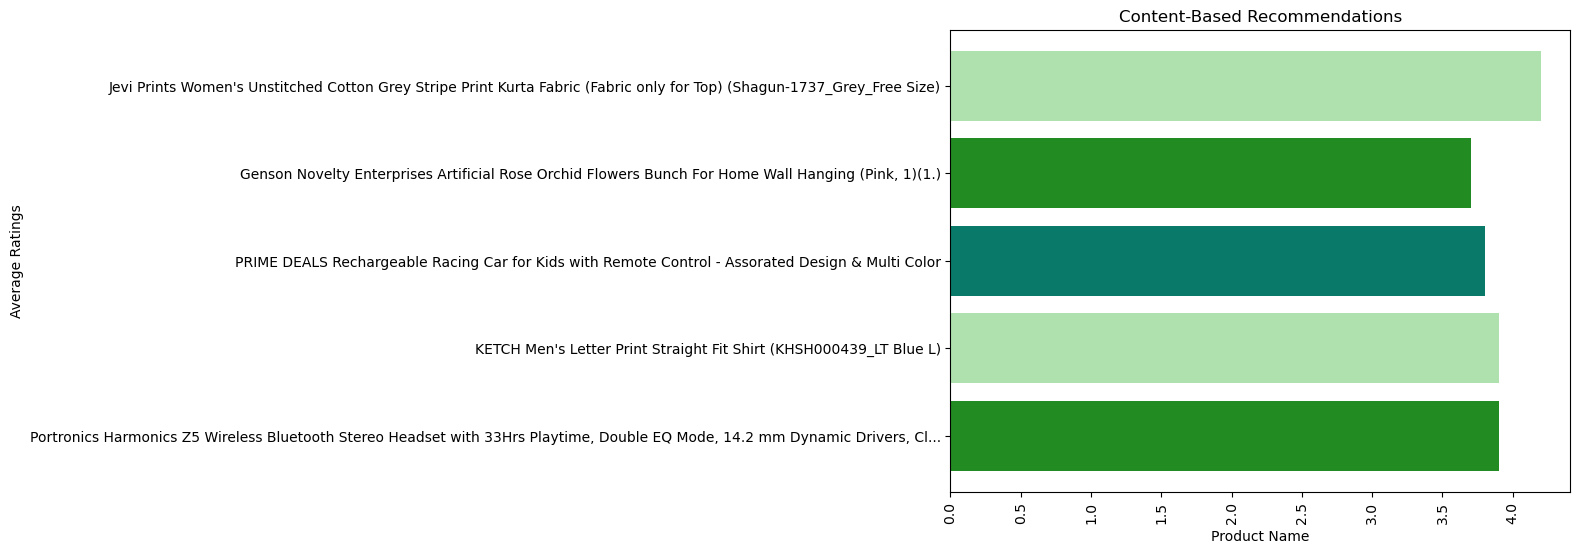

In [116]:
# Visualize content-based recommendations
colors = ['#228B22', '#AFE1AF', '#097969']
plt.figure(figsize=(8, 6))
plt.barh(recommendations['name'], recommendations['ratings'], color=colors)
plt.xlabel('Product Name')
plt.ylabel('Average Ratings')
plt.title('Content-Based Recommendations')
plt.xticks(rotation=90)
plt.show()

In [103]:
# Content-based filtering

# Calculate the performance metrics for content-based filtering
content_actual_ratings = []
content_predicted_ratings = []

for i, product_name in enumerate(test_data['name']):
    recommendations = get_content_based_recommendations(product_name, num_recommendations=5)
    if recommendations is not None:
        content_actual_ratings.extend([test_data.iloc[i]['ratings']] * len(recommendations))
        content_predicted_ratings.extend(recommendations['ratings'])

content_mse = mean_squared_error(content_actual_ratings, content_predicted_ratings)
content_mae = mean_absolute_error(content_actual_ratings, content_predicted_ratings)
content_r2 = r2_score(content_actual_ratings, content_predicted_ratings)

# Print the performance metrics for content-based filtering
print('Content-Based Filtering:')
print('RMSE:', np.sqrt(content_mse))
print('MAE:', content_mae)
print('R2 Score:', content_r2)


Content-Based Filtering:
RMSE: 0.8443820225466669
MAE: 0.5546699999999999
R2 Score: -1.0981236477519651


In [104]:
def hybrid_recommendation(n=5):
    # Popularity-based filtering
    popularity_recs = sorted_recommendations.index.values.tolist()

    # Content-based filtering
    content_recs = get_content_based_recommendations(popularity_recs[0], n)

    # Combine the results
    hybrid_recs = popularity_recs + content_recs['name'].tolist()

    # Remove duplicates
    hybrid_recs = list(set(hybrid_recs))

    # Select the final recommendations from the sampled_dataset
    final_recommendations = sampled_dataset[sampled_dataset['name'].isin(hybrid_recs)]

    # Sort the final recommendations by average ratings in descending order
    final_recommendations = final_recommendations.sort_values(by='ratings', ascending=False)

     # Return the top N recommendations
    return final_recommendations[['name', 'actual_price', 'discount_price', 'main_category', 'ratings', 'no_of_ratings']].head(n)


recommendations = hybrid_recommendation(n=5)  # Generate 5 hybrid recommendations

In [105]:
recommendations

,name,actual_price,discount_price,main_category,ratings,no_of_ratings
7097,Pujia Mills Women's Floral Printed Georgett Pu...,3000.0,699.0,women's clothing,5.0,1.0
5437,Psalm 46: 10 - Purple Checkbook Cover (9.99),2928.0,679.0,stores,4.9,1158.0
4986,Reading (Flash Card 4-pk),1159.0,679.0,stores,4.8,2971.0
9756,Music Nomad MN105 Fretboard Oil Cleaner and Co...,3999.0,1959.0,music,4.8,6414.0
3199,Vandoren CR1025 Bb Clarinet Traditional Reeds ...,6200.0,2985.0,music,4.8,3698.0


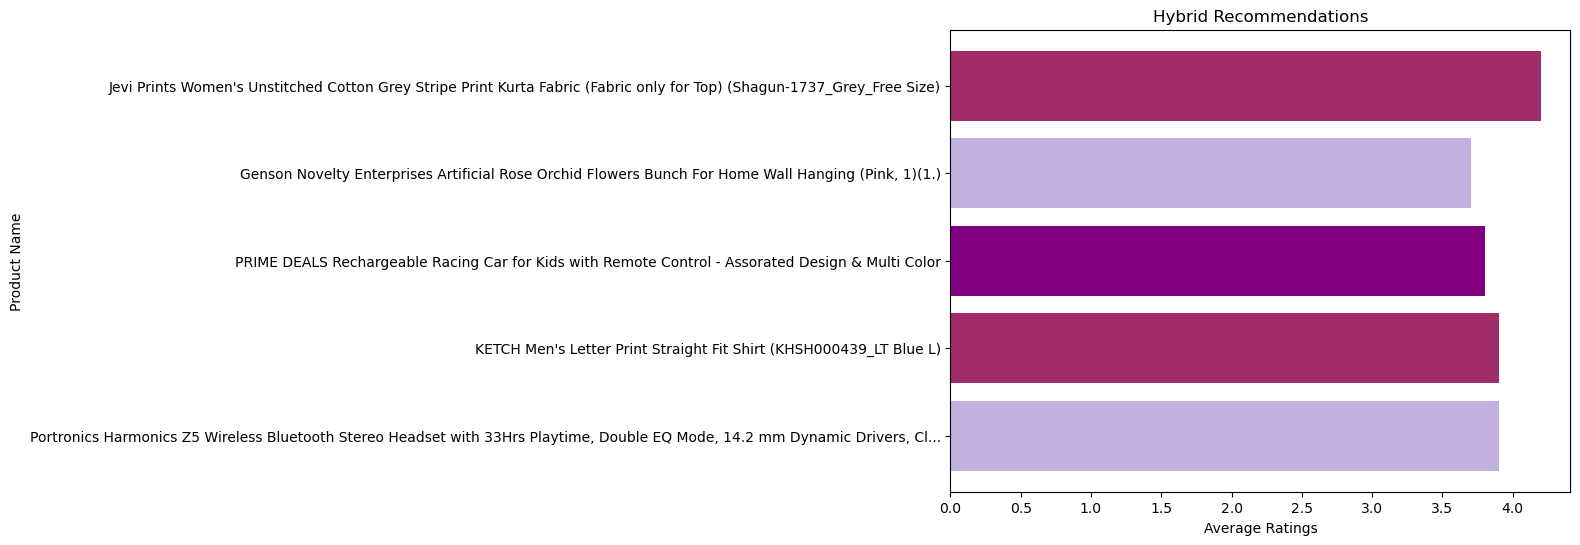

In [119]:
# Visualize the recommendations as a horizontal bar chart
colors = ['#C3B1E1', '#9F2B68', '#800080']
plt.figure(figsize=(8, 6))
plt.barh(recommendations['name'], recommendations['ratings'], color = colors)
plt.xlabel('Average Ratings')
plt.ylabel('Product Name')
plt.title('Hybrid Recommendations')
plt.show()

In [106]:
# Train the hybrid recommender on the training set
train_recommendations = hybrid_recommendation(n=5)

In [107]:
train_recommendations

,name,actual_price,discount_price,main_category,ratings,no_of_ratings
7097,Pujia Mills Women's Floral Printed Georgett Pu...,3000.0,699.0,women's clothing,5.0,1.0
5437,Psalm 46: 10 - Purple Checkbook Cover (9.99),2928.0,679.0,stores,4.9,1158.0
4986,Reading (Flash Card 4-pk),1159.0,679.0,stores,4.8,2971.0
9756,Music Nomad MN105 Fretboard Oil Cleaner and Co...,3999.0,1959.0,music,4.8,6414.0
3199,Vandoren CR1025 Bb Clarinet Traditional Reeds ...,6200.0,2985.0,music,4.8,3698.0


In [108]:
# Evaluate the hybrid recommender on the test data
test_recommendations = []
for i, product_name in enumerate(test_data['name']):
    train_product_names = train_data['name'].tolist()
    if product_name in train_product_names:
        recommendations = get_content_based_recommendations(product_name, num_recommendations=5)
        if recommendations is not None:
            test_recommendations.append(recommendations)

# Calculate the performance metrics for the recommendations
mse_scores = []
mae_scores = []
r2_scores = []

for i, recommendations in enumerate(test_recommendations):
    if i < len(test_recommendations):
        actual_ratings = np.array([test_data.iloc[i]['ratings']] * len(recommendations))
        predicted_ratings = np.array(recommendations['ratings'])
        mse_scores.append(mean_squared_error(actual_ratings, predicted_ratings))
        mae_scores.append(mean_absolute_error(actual_ratings, predicted_ratings))
        r2_scores.append(r2_score(actual_ratings, predicted_ratings))
    else:
        print("Error: Index out of bounds")

In [109]:
# Calculate and print the average performance metrics
mean_rmse = np.mean(np.sqrt(mse_scores))
mean_mae = np.mean(mae_scores)
mean_r2 = np.mean(r2_scores)

print('Average RMSE:', mean_rmse)
print('Average MAE:', mean_mae)
print('Average R2 Score:', mean_r2)


Average RMSE: 0.5946241150157078
Average MAE: 0.4824390243902439
Average R2 Score: 0.08943089430894309


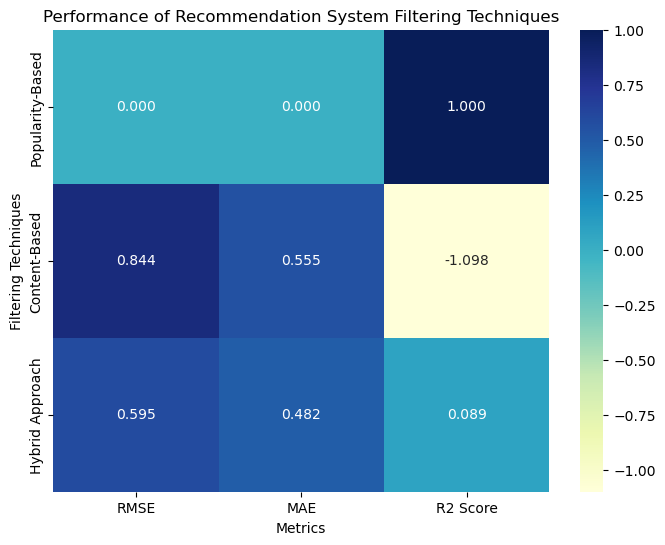

In [110]:


# Example data for each filtering technique
popularity_rmse = 0.0
popularity_mae = 0.0
popularity_r2 = 1.0

content_rmse = 0.844
content_mae = 0.555
content_r2 = -1.098

hybrid_rmse = 0.595
hybrid_mae = 0.482
hybrid_r2 = 0.089

# Create a list of lists for the performance metrics
data = [
    [popularity_rmse, popularity_mae, popularity_r2],
    [content_rmse, content_mae, content_r2],
    [hybrid_rmse, hybrid_mae, hybrid_r2]
]

# Define the labels for filtering techniques and metrics
labels = ['Popularity-Based', 'Content-Based', 'Hybrid Approach']
metrics = ['RMSE', 'MAE', 'R2 Score']

# Create a heatmap using Seaborn
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data, annot=True, cmap='YlGnBu', fmt=".3f", xticklabels=metrics, yticklabels=labels, ax=ax)
ax.set_title('Performance of Recommendation System Filtering Techniques')
ax.set_xlabel('Metrics')
ax.set_ylabel('Filtering Techniques')

plt.show()
